# Bayesian biodiversity: PREDICTS data exploration

### TODO
- Filtering of data
- Color palettes
- Number formatting below 1

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import geopandas as geopd
# from shapely.geometry import Point
from matplotlib.ticker import FuncFormatter

In [183]:
# Load black for formatting
import jupyter_black

jupyter_black.load()

# Adjust display settings for pandas
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [187]:
# Load the complete data set
df_predicts = pd.read_csv("../../data/PREDICTS/merged_data.csv")

/var/folders/pd/qpp_vpcn3wv209_68c5q1_r80000gn/T/ipykernel_78208/2181167663.py:2: DtypeWarning: Columns (5,7,23,24,36,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df_predicts = pd.read_csv("../../data/PREDICTS/merged_data.csv")


In [407]:
df_predicts.shape

(4318808, 68)

In [189]:
df_predicts.head()

,_id,Source_ID,Reference,Study_number,Study_name,Block,Site_number,Site_name,SS,SSS,SSB,SSBS,Longitude,Latitude,Coordinates_method,Country,Country_distance_metres,UN_region,UN_subregion,Realm,Biome,Ecoregion,Ecoregion_distance_metres,Wilderness_area,Hotspot,Study_common_taxon,Rank_of_study_common_taxon,Sample_start_earliest,Sample_end_latest,Sample_midpoint,Sample_date_resolution,Sampling_method,Sampling_effort,Rescaled_sampling_effort,Sampling_effort_unit,Max_linear_extent_metres,Transect_details,Taxon,Taxon_number,Taxon_name_entered,Parsed_name,Best_guess_binomial,COL_ID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Higher_taxon,Indication,Name_status,Rank,Diversity_metric_type,Diversity_metric,Diversity_metric_is_effort_sensitive,Diversity_metric_is_suitable_for_Chao,Diversity_metric_unit,Measurement,Effort_corrected_measurement,Predominant_land_use,Source_for_predominant_land_use,Use_intensity,Habitat_as_described,Habitat_patch_area_square_metres,Km_to_nearest_edge_of_habitat,Years_since_fragmentation_or_conversion
0,26004,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F2,32,F2.P,AD1_2008__Billeter 8,AD1_2008__Billeter 8 32,AD1_2008__Billeter 8 F2,AD1_2008__Billeter 8 F2 32,-1.590365,48.472153,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a Green-veins habitat and an a...,Lasioglossum morio,49,Lasioglossum morio,Lasioglossum morio,Lasioglossum morio,6967008.0,Animalia,Arthropoda,Insecta,Hymenoptera,Halictidae,Lasioglossum,morio,Hymenoptera,Hymenoptera: Apidae sensu lato,accepted name,Species,Abundance,abundance,True,True,individuals,0.0,0.0,Cropland,Direct from publication / author,Minimal use,NaN,NaN,NaN,13.5
1,26006,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F2,32,F2.P,AD1_2008__Billeter 8,AD1_2008__Billeter 8 32,AD1_2008__Billeter 8 F2,AD1_2008__Billeter 8 F2 32,-1.590365,48.472153,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a Green-veins habitat and an a...,Lasioglossum pauxillum,51,Lasioglossum pauxillum,Lasioglossum pauxillum,Lasioglossum pauxillum,6967187.0,Animalia,Arthropoda,Insecta,Hymenoptera,Halictidae,Lasioglossum,pauxillum,Hymenoptera,Hymenoptera: Apidae sensu lato,accepted name,Species,Abundance,abundance,True,True,individuals,0.0,0.0,Cropland,Direct from publication / author,Minimal use,NaN,NaN,NaN,13.5
2,26024,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F3,33,F3.A,AD1_2008__Billeter 8,AD1_2008__Billeter 8 33,AD1_2008__Billeter 8 F3,AD1_2008__Billeter 8 F3 33,-1.610663,48.540593,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a Green-veins habitat and an a...,Andrena helvola,11,Andrena helvola,Andrena helvola,Andrena helvola,6960605.0,Animalia,Arthropoda,Insecta,Hymenoptera,Andrenidae,Andrena,helvola,Hymenoptera,Hymenoptera: Apidae sensu lato,accepted name,Species,Abundance,abundance,True,True,individuals,0.0,0.0,Cropland,Direct from publication / author,Light use,NaN,NaN,NaN,63.5
3,26031,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F3,33,F3.A,AD1_2008__Billeter 8,AD1_2008__Billeter 8 33,AD1_2008__Billeter 8 F3,AD1_2008__Billeter 8 F3 33,-1.610663,48.540593,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a G

## Basic data inspection

### Data scope and coverage 

In [275]:
# List with relevant information to display
labels = ["sampling locations", "countries", "species", "studies"]
columns = ["SSS", "Country", "Taxon_name_entered", "SS"]

# Print stats for each relevant column
print(f"Number of observations: {df_predicts.shape[0]:,}")
for label, column in zip(labels, columns):
    count = df_predicts[column].nunique()
    print(f"Number of {label}: {count:,}")

Number of observations: 4,318,808
Number of sampling locations: 35,736
Number of countries: 101
Number of species: 53,925
Number of studies: 817


### Proportion of missing values

In [11]:
# Calculate the % of missing values per column
round(df_predicts.isna().sum() / df_predicts.isna().count(), 3) * 100

_id                                         0.0
Source_ID                                   0.0
Reference                                   0.0
Study_number                                0.0
Study_name                                  0.0
Block                                      47.1
Site_number                                 0.0
Site_name                                   0.0
SS                                          0.0
SSS                                         0.0
SSB                                         0.0
SSBS                                        0.0
Longitude                                   0.0
Latitude                                    0.0
Coordinates_method                          0.0
Country                                     0.0
Country_distance_metres                     0.0
UN_region                                   0.0
UN_subregion                                0.0
Realm                                       0.0
Biome                                   

**Comment:** Good data coverage on most variables we want to use. There is quite a lot of missing data in the lowest levels of the taxonomy (genus and species). Also missing data on linear extent of many sites, which we want to use in the detection model. 

### Sampling methods

In [273]:
# Display all sampling methods
set(df_predicts["Sampling_method"].tolist())

{'accoustic encounter transect',
 'aerial flight-inception  trap',
 'aerial flight-interception trap',
 'aerial nets',
 'aerial transect',
 'anabat detector',
 'baited pit-fall traps',
 'baited sherman traps along transects',
 'baited traps',
 'bamboo twigs',
 'biomass estimation',
 'bole trap',
 'call playback',
 'call surveys',
 'camera traps',
 'cylindrical gauze traps',
 'drift fences with traps',
 'fall nets under trees',
 'fern collection',
 'fixed plots/quadrats',
 'flight trap',
 'flower visitation observation',
 'flower visitations',
 'fogging',
 'glue traps',
 'harp trap',
 'light trap',
 'line transect distance sampling',
 'line/belt transects',
 'litter and twigs augmented',
 'litter augmented',
 'litter collection',
 'live traps',
 'mackinnon list survey',
 'malaise traps',
 'mist-netting',
 'mixed trap',
 'mixed traps',
 'multiple',
 'pan traps',
 'phytometer',
 'pit-fall traps',
 'pit-fall traps with drift fences',
 'pitfall trap transects',
 'plots/quadrats',
 'point co

### Number of taxa per site 

In [410]:
# Calculate number of species per unique site (groupby source-study-block-site)
# Taxon_name_entered is the only field that gives the correct count
taxa_per_site = df_predicts.groupby("SSBS")["Taxon_name_entered"].nunique().to_numpy()
print(np.mean(taxa_per_site))
print(np.min(taxa_per_site))
print(np.max(taxa_per_site))

120.8531452876651
1
1857


### Number of sites per study

In [366]:
# Calculate number of sites per study 
# (groupby source-study, count source-study-block-site)
sites_per_study = df_predicts.groupby("SS")["SSBS"].nunique().to_numpy()
print(np.mean(sites_per_study))
print(np.min(sites_per_study))
print(np.max(sites_per_study))

43.74051407588739
2
754


### Number of blocks and sites per block


In [418]:
# Number of studies that contain blocks
num_block_studies = df_predicts[df_predicts["Block"].notnull()]["SS"].nunique()
num_block_studies

255

In [374]:
# Calculate number of sites per block, by filtering out studies with no block definitions
# (groupby source-study-block, count source-study-block-site)
sites_per_block = (
    df_predicts[df_predicts["Block"].notnull()]
    .groupby("SSB")["SSBS"]
    .nunique()
    .to_numpy()
)
print(np.mean(sites_per_block))
print(np.min(sites_per_block))
print(np.max(sites_per_block))

3.997634917222103
1
148


### Land use types and intensities

In [284]:
set(df_predicts["Predominant_land_use"].tolist())

{'Cannot decide',
 'Cropland',
 'Intermediate secondary vegetation',
 'Mature secondary vegetation',
 'Pasture',
 'Plantation forest',
 'Primary vegetation',
 'Secondary vegetation (indeterminate age)',
 'Urban',
 'Young secondary vegetation'}

In [383]:
# Percentage of "Cannot decide" land use types
round(
    (
        len(df_predicts[df_predicts["Predominant_land_use"] == "Cannot decide"])
        / len(df_predicts)
    )
    * 100,
    2,
)

0.19

In [388]:
set(df_predicts["Use_intensity"].tolist())

{'Cannot decide', 'Intense use', 'Light use', 'Minimal use'}

In [387]:
# Percentage of "Cannot decide" land use intensities
round(
    (
        len(df_predicts[df_predicts["Use_intensity"] == "Cannot decide"])
        / len(df_predicts)
    )
    * 100,
    2,
)

9.41

**Comment:** Can safely drop the "Cannot decide" observations for land use, but for intensity we need to include it as a category.

## Functions for plotting

In [456]:
def plot_frequencies(
    df: pd.DataFrame,
    group_col: str,
    count_type: str,
    title: str,
    sort_ascending: bool = False,
    flip_axes: bool = False,
) -> None:
    """
    Plot frequencies of unique values or counts in a specified column, grouped by another column.

    Args:
        df (pd.DataFrame): Dataframe containing the data for plotting.
        group_col (str): The column name to group by.
        count_type (str): Specifies whether to count 'measurements' or 'unique_values'.
        title (str): The title for the plot.
        sort_ascending (bool): Whether to sort the counts in ascending order. Defaults is to
            sort in descending order.
        flip_axes (bool): Whether to flip the x and y axes. Defaults to False.

    Returns
        None
    """
    assert count_type in [
        "measurements",
        "unique_values",
    ], "count_type must be either 'measurements' or 'unique_values'"

    # Create new dataframe from groupby and unique values or count
    agg_func = "nunique" if count_type == "unique_values" else "count"
    df_counts = (
        df.groupby(group_col)["SSBS"]
        .agg(agg_func)
        .reset_index()
        .rename(columns={"SSBS": "Frequency"})
    )

    # Sort the data according to the specification
    df_counts = df_counts.sort_values("Frequency", ascending=sort_ascending)

    # Set figure style and create figure
    sns.set_style("dark")
    sns.set()
    plt.figure(figsize=(10, 6))

    # Define a formatter function for the labels
    def _number_formatter(value, *args):
        # Check how large the values in the data are
        # If up to 10, use decimal formatting
        max_val = df_counts["Frequency"].max()
        if max_val <= 10:
            return f"{value:.1f}"
        else:
            return f"{value:,.0f}"

    # Create the barplot with the specified orientation
    if flip_axes:
        ax = sns.barplot(data=df_counts, x="Frequency", y=group_col, linewidth=0)
        plt.xlabel("Frequency")
        plt.ylabel(group_col)
        ax.xaxis.set_major_formatter(FuncFormatter(_number_formatter))
    else:
        ax = sns.barplot(data=df_counts, x=group_col, y="Frequency", linewidth=0)
        plt.xlabel(group_col)
        plt.ylabel("Frequency")
        ax.yaxis.set_major_formatter(FuncFormatter(_number_formatter))

    # Add labels to bars and show the plot
    ax.bar_label(ax.containers[0], fmt=_number_formatter, padding=3)
    plt.title(title, fontsize=14)
    plt.show()

In [446]:
def plot_histogram_with_density(
    df: pd.DataFrame,
    data_col: str,
    title: str,
    bins: int = 50,
    kde: bool = True,
    lower_lim: int = None,
    upper_lim: int = None,
) -> None:
    """
    Plots a histogram with a density overlay for the specified column of a DataFrame.

    Args:
        df (pd.DataFrame): Dataframe containing the data for plotting.
        data_col (str): The name of the column to plot.
        xlabel (str): The label for the x-axis.
        title (str): The title for the plot.
        bins (int): The number of bins to use for the histogram. Defaults to 50.
        kde (bool): Whether to overlay a kernel density estimate. Defaults to True.
        lower_lim (int): Smallest value to display in the plot. Defaults to None.
        upper_lim (int): Largest value to display in the plot. Defaults to None.

    Returns:
        None
    """
    assert data_col in df.columns, "Dataframe must contain data_col"

    # Filter the dataframe for the lower and upper thresholds
    if lower_lim:
        df = df[df[data_col] >= lower_lim]
    if upper_lim:
        df = df[df[data_col] <= upper_lim]

    # Set figure style
    sns.set_style("dark")
    sns.set()

    # Create the histogram
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(df[data_col], bins=bins, kde=kde)

    # Define a formatter function for the labels
    def _number_formatter(value, *args):
        # Check how large the values in the data are
        # If up to 10, use decimal formatting
        max_val = df[data_col].max()
        if max_val <= 10:
            return f"{value:.1f}"
        else:
            return f"{value:,.0f}"

    # Set formatting
    ax.xaxis.set_major_formatter(FuncFormatter(_number_formatter))
    ax.yaxis.set_major_formatter(FuncFormatter(_number_formatter))
    plt.title(title, fontsize=14)
    plt.xlabel("Bins")
    plt.ylabel("Frequency")

    plt.show()

## Diversity metrics

### Measurements per diversity metric and abundance unit type

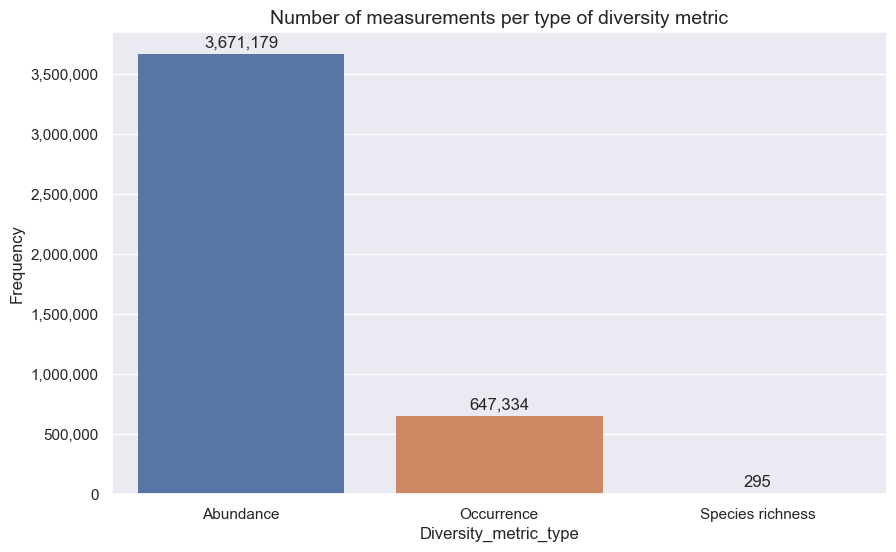

In [457]:
plot_frequencies(
    df_predicts,
    group_col="Diversity_metric_type",
    count_type="measurements",
    title="Number of measurements per type of diversity metric",
    sort_ascending=False,
    flip_axes=False,
)

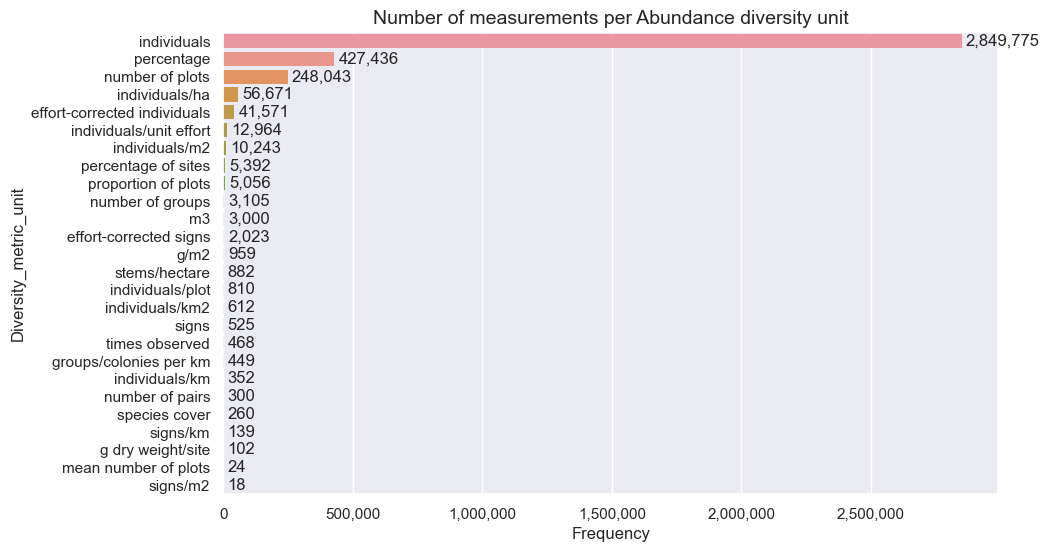

In [458]:
plot_frequencies(
    df_abundance,
    group_col="Diversity_metric_unit",
    count_type="measurements",
    title="Number of measurements per Abundance diversity unit",
    sort_ascending=False,
    flip_axes=True,
)

### Filtering of data for rest of analysis

Since both biodiversity metrics (total abundance and compositional similarity) are abundance-based, we filter the dataframe to only contain abundance measurements.

In [431]:
# Filter dataframe to only include abundance measurements
df_abundance = df_predicts[df_predicts["Diversity_metric_type"] == "Abundance"]

## Geographic and biogeographic coverage

### Realms and biomes

In [432]:
# List all realms
realms = list(set(df_predicts["Realm"]))
print(realms)

['Afrotropic', 'Oceania', 'Nearctic', 'Australasia', 'Indo-Malay', 'Palearctic', 'Neotropic']


In [459]:
# List all biomes per realm
for realm in realms:
    biomes = list(set(df_predicts[df_predicts["Realm"] == realm]["Biome"]))
    print(f"{realm}: {biomes}\n")

Afrotropic: ['Deserts & Xeric Shrublands', 'Montane Grasslands & Shrublands', 'Tropical & Subtropical Moist Broadleaf Forests', 'Mangroves', 'Tropical & Subtropical Dry Broadleaf Forests', 'Tropical & Subtropical Grasslands, Savannas & Shrublands', 'Mediterranean Forests, Woodlands & Scrub']

Oceania: ['Tropical & Subtropical Dry Broadleaf Forests', 'Tropical & Subtropical Moist Broadleaf Forests']

Nearctic: ['Deserts & Xeric Shrublands', 'Tropical & Subtropical Grasslands, Savannas & Shrublands', 'Temperate Grasslands, Savannas & Shrublands', 'Temperate Broadleaf & Mixed Forests', 'Mediterranean Forests, Woodlands & Scrub', 'Temperate Conifer Forests', 'Tropical & Subtropical Coniferous Forests', 'Boreal Forests/Taiga']

Australasia: ['Deserts & Xeric Shrublands', 'Montane Grasslands & Shrublands', 'Tropical & Subtropical Moist Broadleaf Forests', 'Tropical & Subtropical Grasslands, Savannas & Shrublands', 'Temperate Grasslands, Savannas & Shrublands', 'Temperate Broadleaf & Mixed Fo

### Sites and measurements per biome

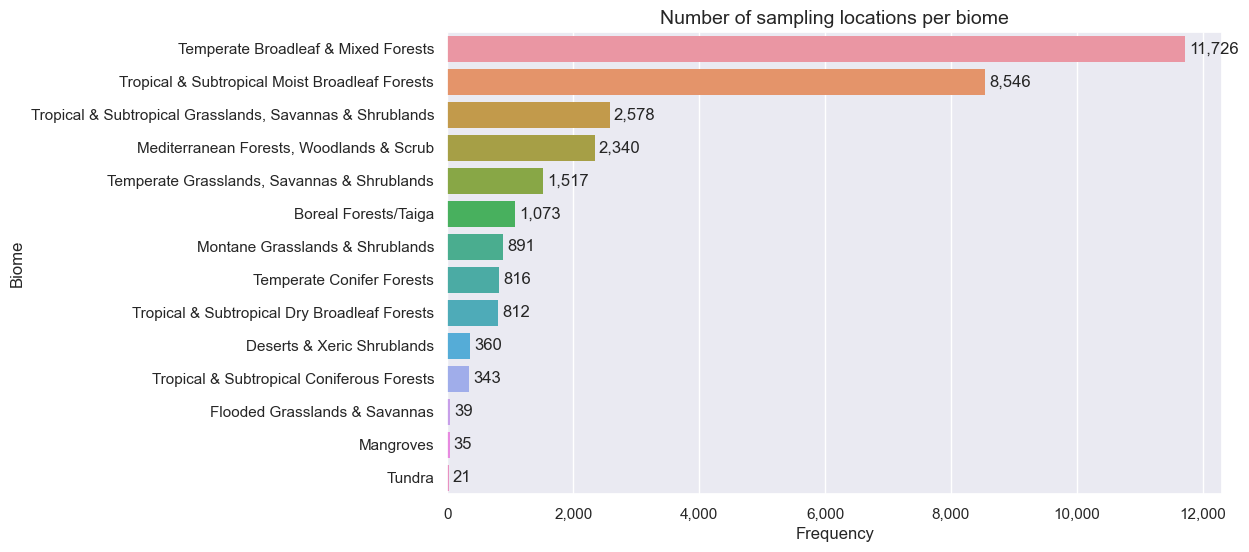

In [460]:
plot_frequencies(
    df_abundance,
    group_col="Biome",
    count_type="unique_values",
    title="Number of sampling locations per biome",
    sort_ascending=False,
    flip_axes=True,
)

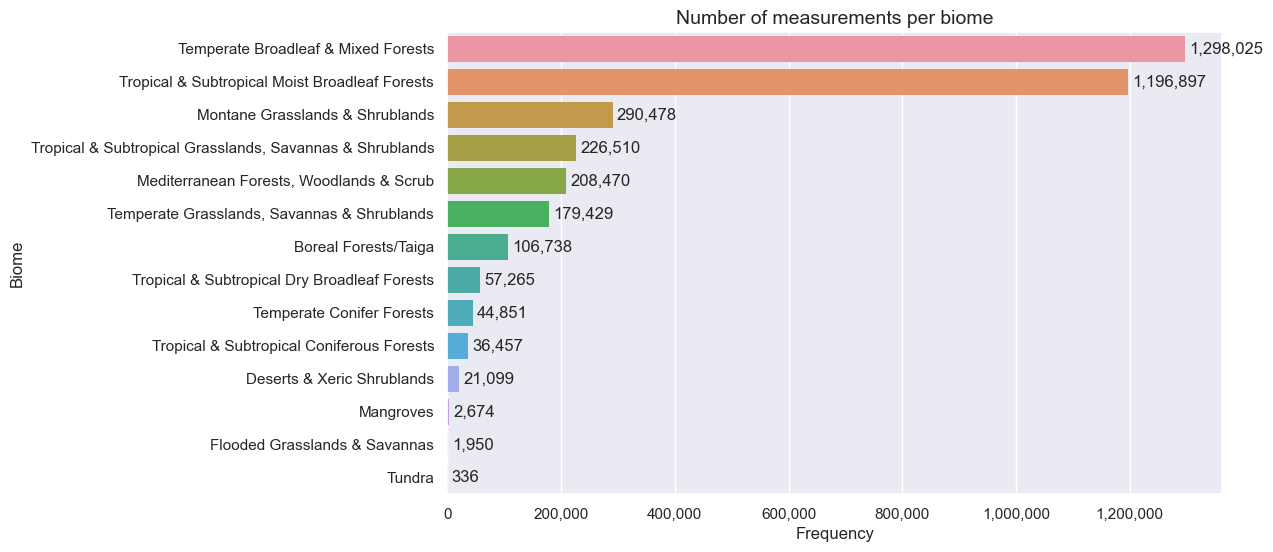

In [461]:
plot_frequencies(
    df_abundance,
    group_col="Biome",
    count_type="measurements",
    title="Number of measurements per biome",
    sort_ascending=False,
    flip_axes=True,
)

### Sites and measurements per UN subregion

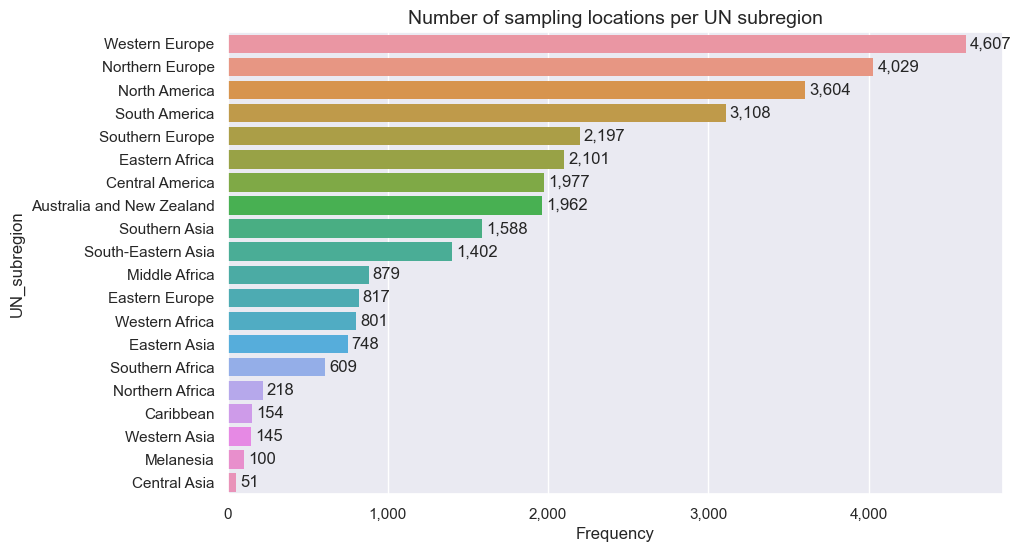

In [462]:
plot_frequencies(
    df_abundance,
    group_col="UN_subregion",
    count_type="unique_values",
    title="Number of sampling locations per UN subregion",
    sort_ascending=False,
    flip_axes=True,
)

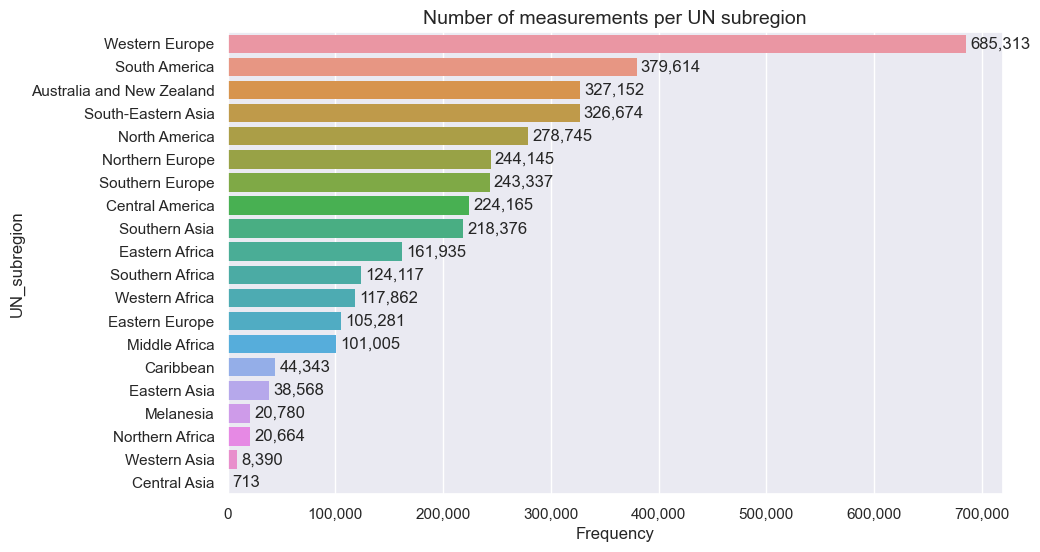

In [463]:
plot_frequencies(
    df_abundance,
    group_col="UN_subregion",
    count_type="measurements",
    title="Number of measurements per UN subregion",
    sort_ascending=False,
    flip_axes=True,
)

## Taxonomic coverage

### Measurements per Kingdom 

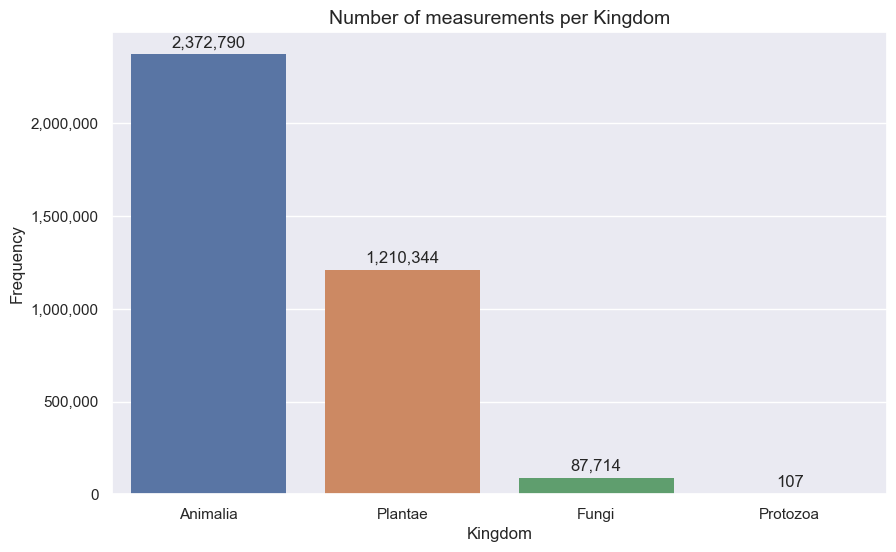

In [464]:
plot_frequencies(
    df_abundance,
    group_col="Kingdom",
    count_type="measurements",
    title="Number of measurements per Kingdom",
    sort_ascending=False,
    flip_axes=False,
)

### Measurements per Phylum

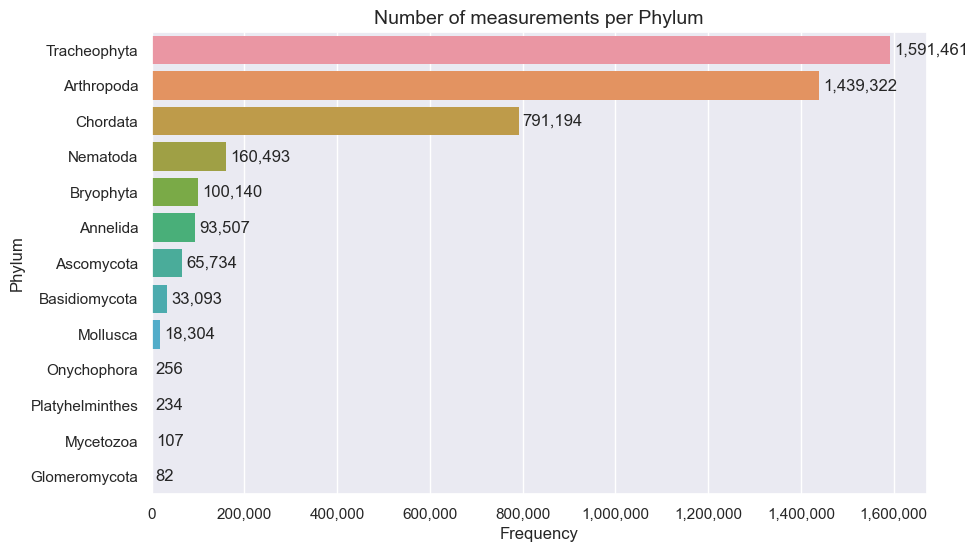

In [465]:
plot_frequencies(
    df_predicts,
    group_col="Phylum",
    count_type="measurements",
    title="Number of measurements per Phylum",
    sort_ascending=False,
    flip_axes=True,
)

### Measurements per Class

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


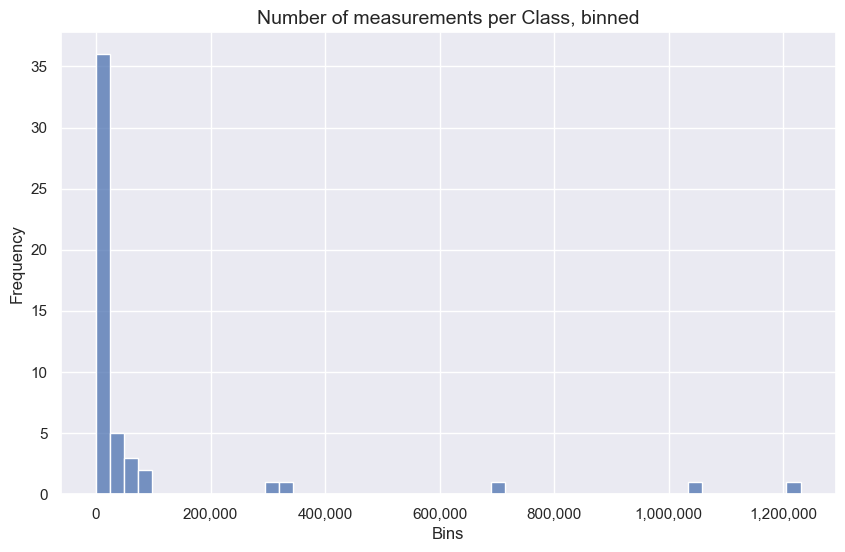

In [450]:
df_class_obs = df_predicts.groupby("Class")["Measurement"].count().reset_index()

plot_histogram_with_density(
    df_class_obs,
    data_col="Measurement",
    title="Number of measurements per Class, binned",
    bins=50,
    kde=False,
    lower_lim=None,
    upper_lim=None,
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


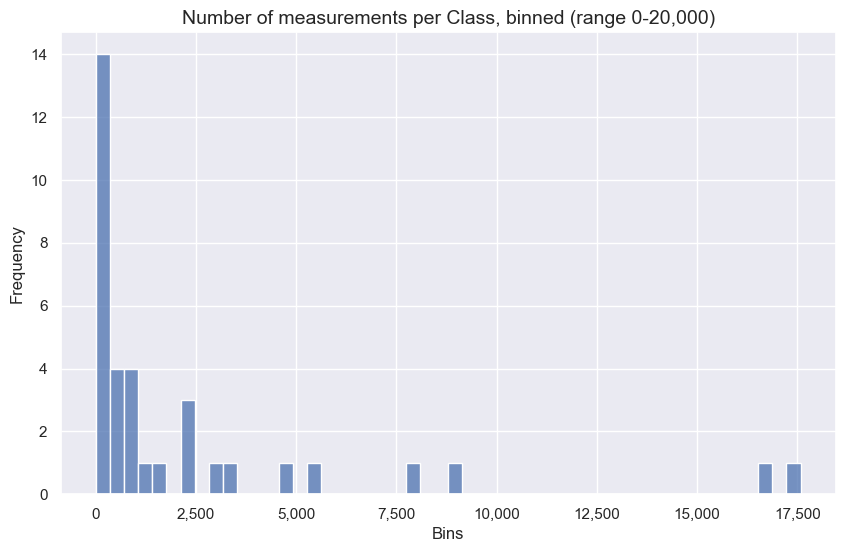

In [448]:
df_class_obs = df_predicts.groupby("Class")["Measurement"].count().reset_index()

plot_histogram_with_density(
    df_class_obs,
    data_col="Measurement",
    title="Number of measurements per Class, binned (range 0-20,000)",
    bins=50,
    kde=False,
    lower_lim=None,
    upper_lim=20000,
)

### Deep dive: Sites and measurements for amphibians in Americas

In [453]:
# Filter dataframe for Americas and amphibians
df_americas_amph = df_abundance.loc[
    (df_predicts["UN_region"] == "Americas") & (df_predicts["Class"] == "Amphibia")
]

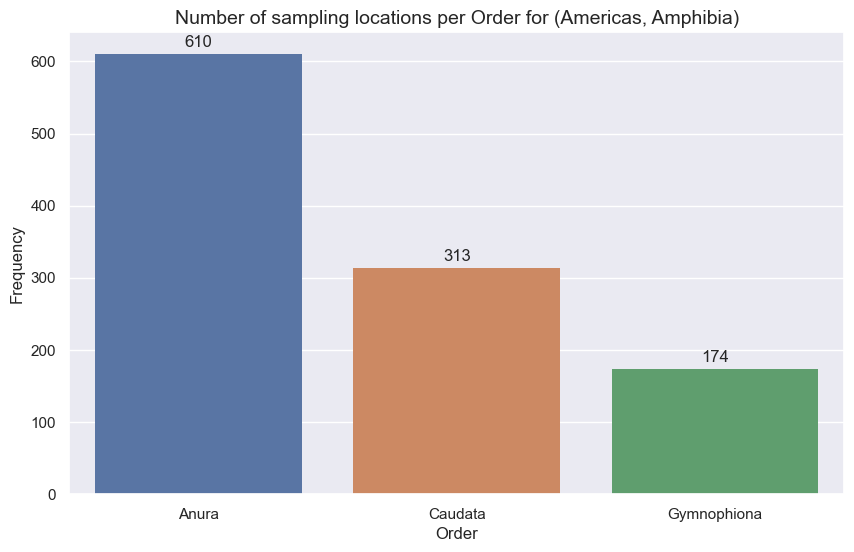

In [454]:
plot_frequencies(
    df_americas_amph,
    group_col="Order",
    count_col="SSBS",
    count_type="unique_values",
    title="Number of sampling locations per Order for (Americas, Amphibia)",
    sort_ascending=False,
    flip_axes=False,
)

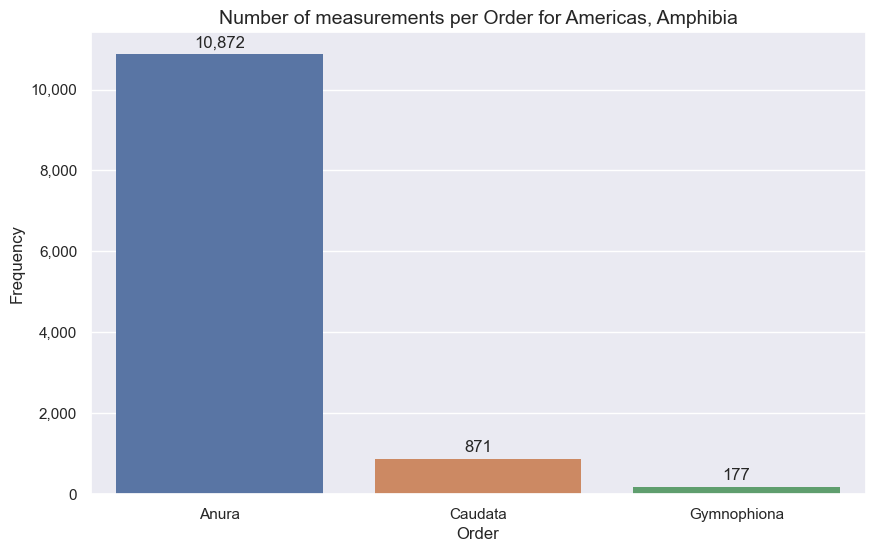

In [455]:
plot_frequencies(
    df_americas_amph,
    group_col="Order",
    count_col="SSBS",
    count_type="measurements",
    title="Number of measurements per Order for Americas, Amphibia",
    sort_ascending=False,
    flip_axes=False,
)

In [179]:
# TODO: Distribution / histograms of class, order, family, genus, species

df_class_sites = pd.DataFrame(
    df_predicts.groupby("Order")["SSS"].nunique()
).reset_index()
df_class_obs = pd.DataFrame(df_predicts.groupby("Order")["SSS"].count()).reset_index()

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


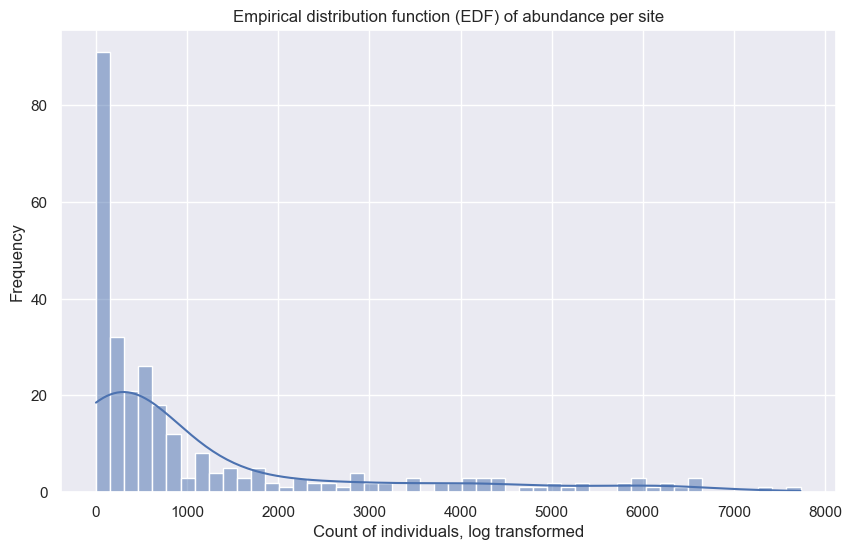

In [180]:
plot_histogram_with_density(
    df_class_sites,
    data_col="SSS",
    title="Empirical distribution function (EDF) of abundance per site",
    xlabel="Count of individuals, log transformed",
    bins=50,
    kde=True,
)

### Distribution of abundance data

In [155]:
# Filter dataframe to only include abundance given as count of individuals
df_abund_ind = df_predicts.loc[
    (df_predicts["Diversity_metric_type"] == "Abundance")
    & (df_predicts["Diversity_metric_unit"] == "individuals")
]

In [158]:
# Check some summary statistics of all the data
stats = ["mean", "median", "min", "max", "std"]
df_abund_ind["Measurement"].agg(stats)

mean          23.001581
median         0.000000
min            0.000000
max       394656.000000
std          575.448345
Name: Measurement, dtype: float64

In [159]:
# Do the same analysis, but averaged across sites
df_agg_stats = pd.DataFrame(
    df_abund_ind.groupby("SSS")["Effort_corrected_measurement"].agg(stats)
).reset_index()
df_agg_stats.drop("SSS", axis="columns").agg("mean")

mean       17.585171
median      1.519691
min         1.256337
max       842.852137
std        85.708034
dtype: float64

In [160]:
# Calculate total abundance for each site
df_ind_count_per_site = (
    pd.DataFrame(df_abund_ind.groupby("SSS")["Effort_corrected_measurement"].sum())
    .reset_index()
    .rename(columns={"Effort_corrected_measurement": "Tot_abundance"})
)

# Do log transformation of abundance numbers
df_ind_count_log = df_ind_count_per_site.copy()
mask = df_ind_count_log["Tot_abundance"] > 0
df_ind_count_log.loc[mask, "Tot_abundance"] = np.log(
    df_ind_count_log.loc[mask, "Tot_abundance"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


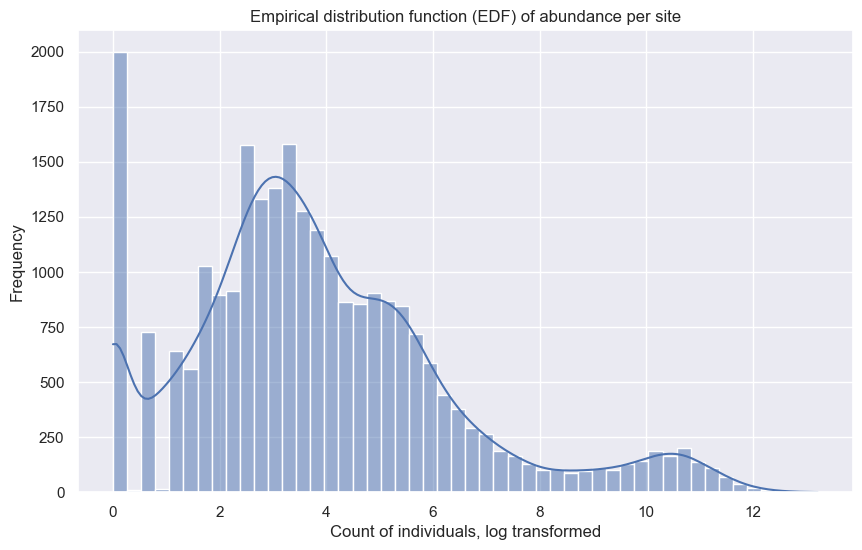

In [162]:
plot_histogram_with_density(
    df_ind_count_log,
    data_col="Tot_abundance",
    title="Empirical distribution function (EDF) of abundance per site",
    xlabel="Count of individuals, log transformed",
    bins=50,
    kde=True,
)

**Comment:** The log transformed count data follows a complex, multimodal distribution with three peaks: at zero, around 3 and around 11. The two density peaks at 3 and 11 can indicate differences in the taxonomic focus of different studies (with frequent and rarer species).

In [163]:
# Perform similar analysis, but instead of log transform, filter out large values
upper_lim = 100

# Filter data for upper limit
df_ind_count_lim = df_ind_count_per_site.copy()
mask = df_ind_count_lim["Tot_abundance"] <= upper_lim
df_ind_count_lim = df_ind_count_lim[mask]

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


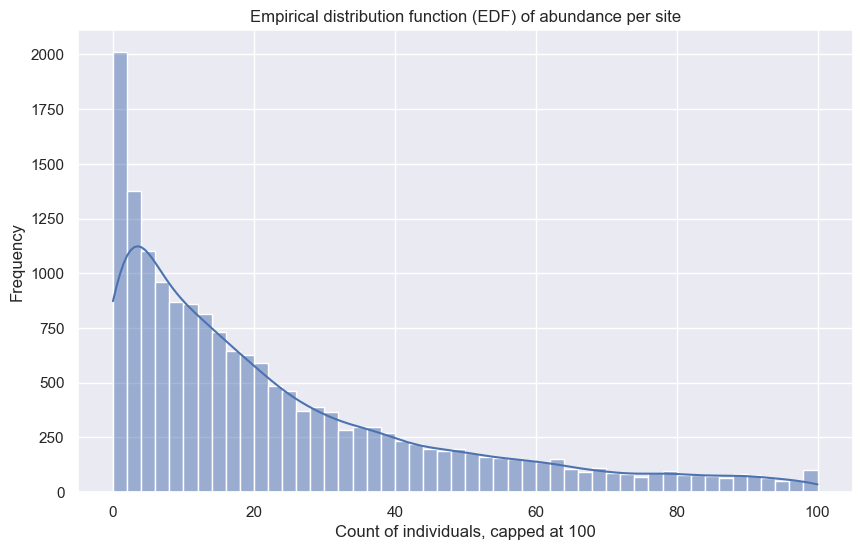

In [164]:
plot_histogram_with_density(
    df_ind_count_lim,
    data_col="Tot_abundance",
    title="Empirical distribution function (EDF) of abundance per site",
    xlabel=f"Count of individuals, capped at {upper_lim}",
    bins=50,
    kde=True,
)

**Comment:** Untransformed count data is approx Poisson, but possibly with a higher frequency of zeros than the standard model would assume. 

### Abundance data dispersion

In [165]:
# Calculate std-mean ratio
df_agg_stats_dropna = df_agg_stats.dropna(subset=["mean", "std"]).copy()
df_agg_stats_dropna["Std_mean_ratio"] = (
    df_agg_stats_dropna["std"] / df_agg_stats_dropna["mean"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


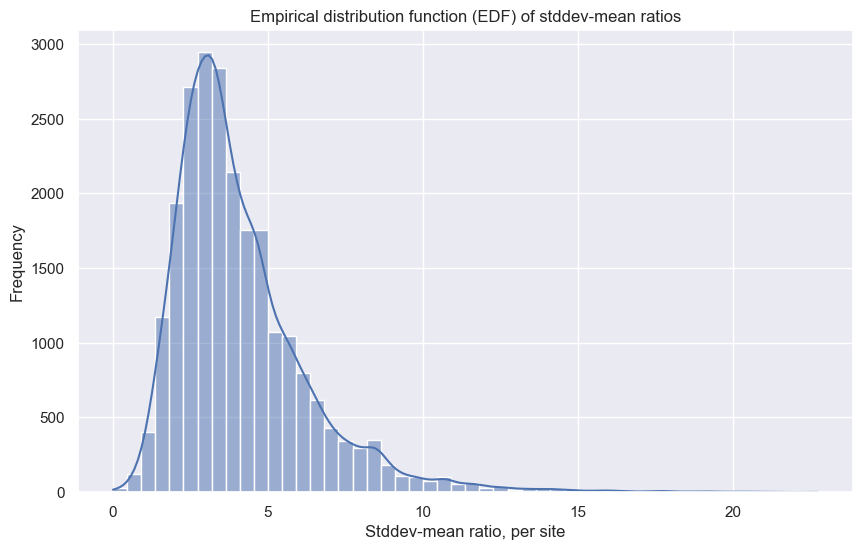

In [166]:
plot_histogram_with_density(
    df_agg_stats_dropna,
    data_col="Std_mean_ratio",
    title="Empirical distribution function (EDF) of stddev-mean ratios",
    xlabel="Stddev-mean ratio, per site",
    bins=50,
    kde=True,
)

**Comment:** If we compare to a Poisson model, which assumes equal mean and variance, the data is highly overdispersed. That would speak in favor for using a Negative-Binomial distribution for count data. Still there are a few instances where data is underdispersed. 

### Distribution of min-max scaled abundance data

In [167]:
# Calculate the total abundance for each site
df_study_site_abund = df_abundance.copy()
df_study_site_abund = (
    pd.DataFrame(
        df_study_site_abund.groupby(["SS", "SSS"])["Effort_corrected_measurement"].sum()
    )
    .reset_index()
    .rename(columns={"Effort_corrected_measurement": "Site_abundance"})
)

In [168]:
# Calculate the max and min abundance within each study
df_study_min_max = (
    pd.DataFrame(
        df_study_site_abund.groupby("SS")["Site_abundance"].agg(["min", "max"])
    )
    .reset_index()
    .rename(columns={"min": "Min_abundance", "max": "Max_abundance"})
)

In [169]:
# Join the first and second dataframes on study
df_study_site_scaled = df_study_site_abund.join(
    df_study_min_max.set_index("SS"), on="SS", how="left", validate="m:1"
)

In [170]:
# Perform min-max scaling of site-level abundance
abund = df_study_site_scaled["Site_abundance"]
min_abund = df_study_site_scaled["Min_abundance"]
max_abund = df_study_site_scaled["Max_abundance"]
df_study_site_scaled["Abundance_min_max"] = (abund - min_abund) / (
    max_abund - min_abund
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


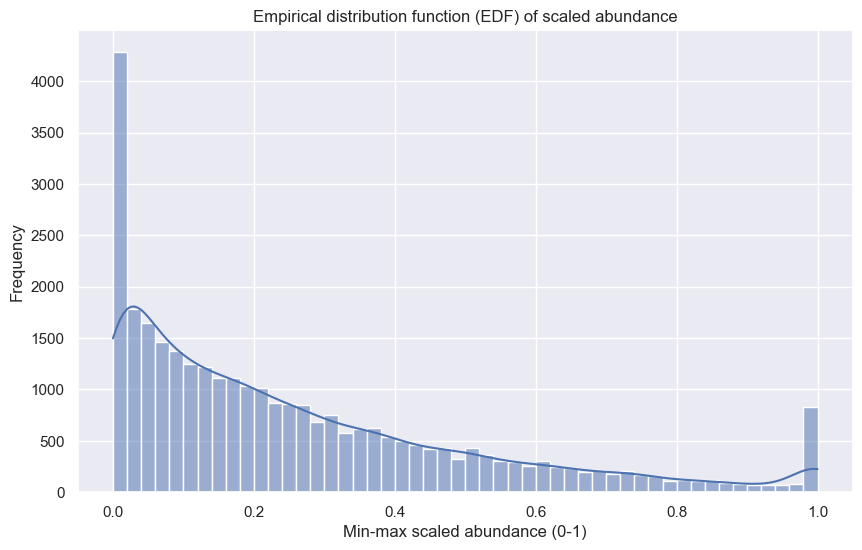

In [171]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Abundance_min_max",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Min-max scaled abundance (0-1)",
    bins=50,
    kde=True,
)

**Comment:** Except for this density at 0 and 1, this distribution could potentially be approximated with a Beta distribution.

### Transformation of the scaled abundance

The authors of BII apply a square-root transformation to the scaled data, then assume that residuals are Gaussian. They also tried a log transformation. We compare both approaches below.

In [172]:
# Do square-root transformation of the scaled data
df_study_site_scaled["Min_max_sqrt"] = 0.0
mask = df_study_site_scaled["Abundance_min_max"] > 0

df_study_site_scaled.loc[mask, "Min_max_sqrt"] = np.sqrt(
    df_study_site_scaled.loc[mask, "Abundance_min_max"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


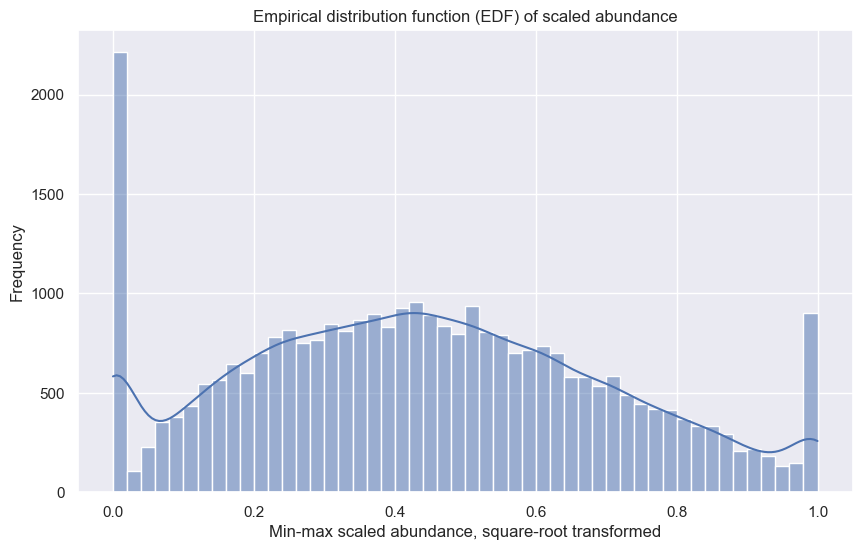

In [173]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Min_max_sqrt",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Min-max scaled abundance, square-root transformed",
    bins=50,
    kde=True,
)

**Comment:** This could be approximated with a Beta or logit-Normal distribution, except for the density at 0 and 1. 

In [174]:
# Do log transformation of the scaled data
df_study_site_scaled["Min_max_log"] = 0.0
mask = df_study_site_scaled["Abundance_min_max"] > 0

df_study_site_scaled.loc[mask, "Min_max_log"] = np.log(
    df_study_site_scaled.loc[mask, "Abundance_min_max"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


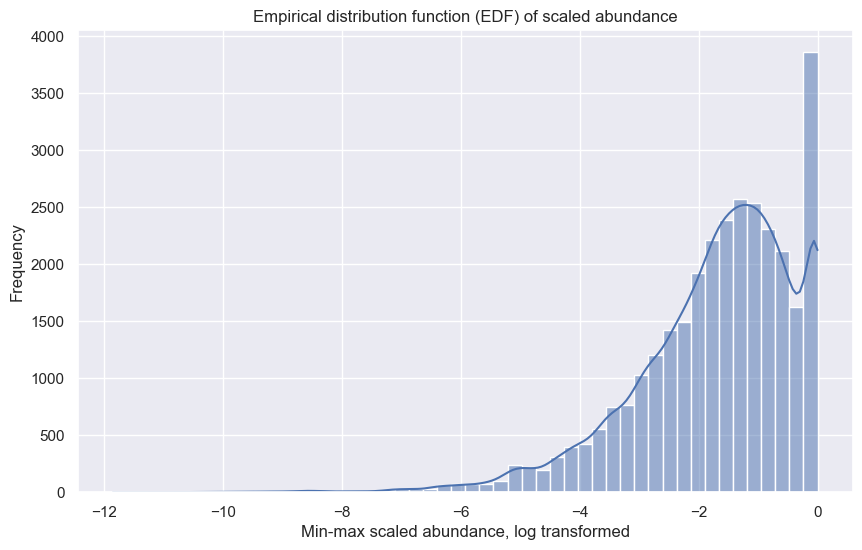

In [175]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Min_max_log",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Min-max scaled abundance, log transformed",
    bins=50,
    kde=True,
)

### Compositional similarity

In [364]:
df_abundance = df_abundance.dropna(subset=["Predominant_land_use"])

In [359]:
# Identify studies with consistent sampling effort across sites
single_effort_studies = (
    df_abundance.groupby("SS")
    .filter(lambda x: x["Sampling_effort"].nunique() == 1)["SS"]
    .unique()
    .tolist()
)

In [360]:
# Identify studies where at least one site is minimally-used primary vegetation
min_primary_studies = (
    df_abundance.loc[
        (df_abundance["Predominant_land_use"] == "Primary vegetation")
        & (df_abundance["Use_intensity"] == "Minimal use")
    ]["SS"]
    .unique()
    .tolist()
)

In [361]:
# Identify studies where at least one site NOT a baseline site
non_min_primary_studies = (
    df_abundance.loc[
        ~(df_abundance["Predominant_land_use"] == "Primary vegetation")
        & (df_abundance["Use_intensity"] == "Minimal use")
    ]["SS"]
    .unique()
    .tolist()
)

In [362]:
# Identify studies with more than one taxon surveyed
multi_taxa_studies = (
    df_abundance.groupby("SS")
    .filter(lambda x: x["Taxon_name_entered"].nunique() > 1)["SS"]
    .unique()
    .tolist()
)

In [395]:
# Filter the original dataframe for all of these criteria
studies_to_include = list(
    set(single_effort_studies)
    & set(min_primary_studies)
    & set(non_min_primary_studies)
    & set(multi_taxa_studies)
)
df_similarity_calc = df_abundance[df_abundance["SS"].isin(studies_to_include)]
len(studies_to_include)

142

In [399]:
def calculate_bray_curtis(df, study, site_1, site_2):

    # Create two dataframes with required information about both sites
    df_site_1 = df[df["SSBS"] == site_1][
        ["SSBS", "Taxon_name_entered", "Measurement"]
    ].sort_values("Taxon_name_entered")
    df_site_2 = df[df["SSBS"] == site_2][
        ["SSBS", "Taxon_name_entered", "Measurement"]
    ].sort_values("Taxon_name_entered")

    # Calculate the abundance of each site
    s1_tot_abund = df_site_1["Measurement"].sum()
    s2_tot_abund = df_site_2["Measurement"].sum()

    # Get lists of taxons for each site
    s1_taxa = df_site_1["Taxon_name_entered"].tolist()
    s2_taxa = df_site_2["Taxon_name_entered"].tolist()

    # Handle cases where one or both sites have zero abundance
    if s1_tot_abund == 0 or s2_tot_abund == 0:
        bray_curtis = 0
    elif s1_tot_abund == 0 and s2_tot_abund == 0:
        bray_curtis = np.nan

    # Case where both sites have abundance values
    else:
        # Check if the list of taxons are identical
        # If they are, we can use operations with numpy arrays
        if set(s1_taxa) == set(s2_taxa) and len(df_site_1) == len(df_site_2):
            pairwise_abundance = np.column_stack(
                (df_site_1["Measurement"], df_site_2["Measurement"])
            )
            min_abundance_sum = np.sum(np.min(pairwise_abundance, axis=1))

        # Otherwise we need to iterate through the lists
        else:
            min_abundance_sum = 0
            for taxon in list(set(s1_taxa) & set(s1_taxa)):
                try:
                    min_abundance_sum += np.min(
                        df_site_1[df_site_1["Taxon_name_entered"]]["Measurement"],
                        df_site_1[df_site_1["Taxon_name_entered"]]["Measurement"],
                    )
                except KeyError: # If the taxon only exists in one of the dataframes
                    min_abundance_sum += 0

        # Calculate the similarity version of the Bray-Curtis dissimilarity metric
        # A value of 1 means that the two sites are identical in composition
        bray_curtis = (2 * min_abundance_sum) / (s1_tot_abund + s2_tot_abund)

    bray_curtis_output = {
        "SS": study,
        "Primary_minimal_site": site_1,
        "Other_site": site_2,
        "Similarity_score": bray_curtis,
    }

    return bray_curtis_output

In [400]:
bray_curtis_scores = []
studies = df_similarity_calc["SS"].unique()

for study in studies:
    df_study = df_similarity_calc[df_similarity_calc["SS"] == study]

    min_primary_sites = (
        df_study.loc[
            (df_study["Predominant_land_use"] == "Primary vegetation")
            & (df_study["Use_intensity"] == "Minimal use")
        ]["SSBS"]
        .unique()
        .tolist()
    )
    all_sites = df_study["SSBS"].unique().tolist()

    for site_1 in min_primary_sites:
        for site_2 in all_sites:
            if site_1 != site_2:
                score = calculate_bray_curtis(df_study, study, site_1, site_2)
                bray_curtis_scores.append(score)
            else:
                continue

df_comp_similarity = pd.DataFrame(bray_curtis_scores)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


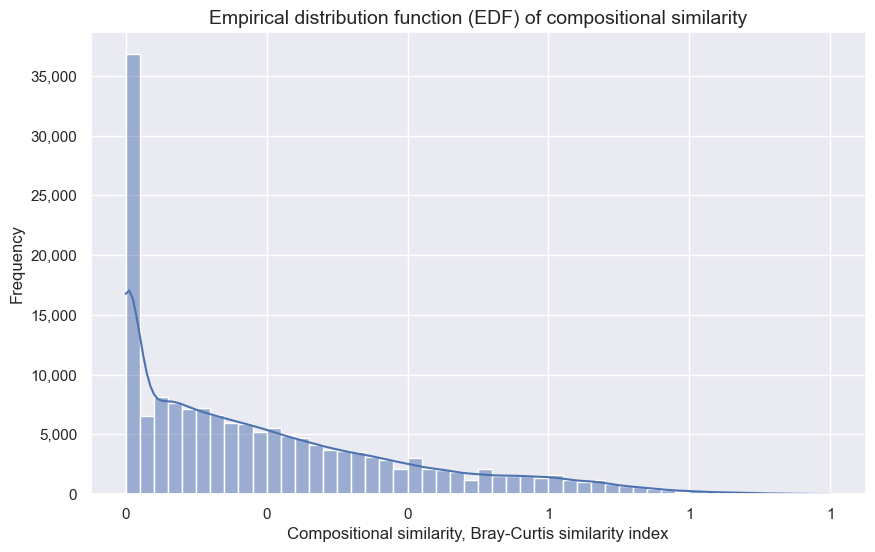

In [402]:
plot_histogram_with_density(
    df_comp_similarity,
    data_col="Similarity_score",
    title="Empirical distribution function (EDF) of compositional similarity",
    xlabel="Compositional similarity, Bray-Curtis similarity index",
    bins=50,
    kde=True,
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


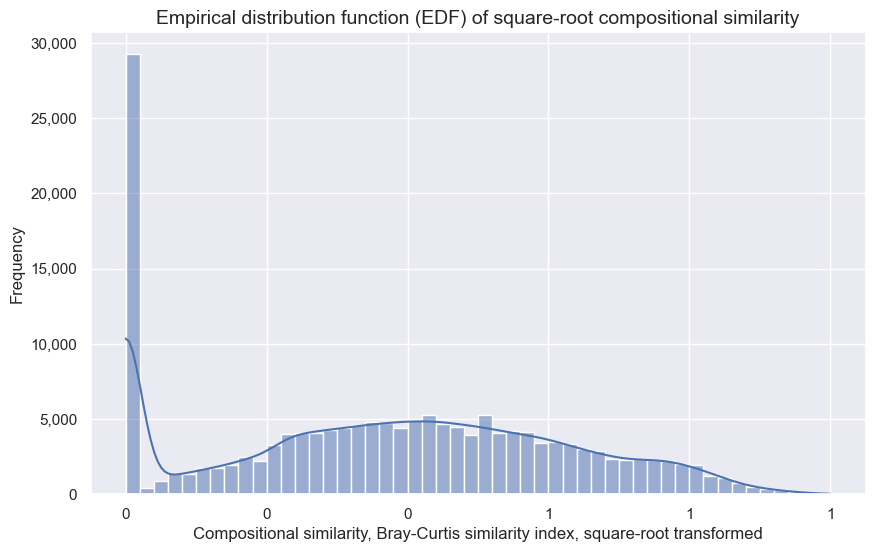

In [405]:
df_comp_similarity["Similarity_score_sqrt"] = np.sqrt(
    df_comp_similarity["Similarity_score"]
)

plot_histogram_with_density(
    df_comp_similarity,
    data_col="Similarity_score_sqrt",
    title="Empirical distribution function (EDF) of square-root compositional similarity",
    xlabel="Compositional similarity, Bray-Curtis similarity index, square-root transformed",
    bins=50,
    kde=True,
)